In [ ]:
!pip install --upgrade ta

In [1]:
from config import API_KEY
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
import sweetviz as sv
import plotly.express as px

from ta.trend import MACD as md
import pandas as pd
import ta
from ta.utils import dropna


Obtaining Data

In [2]:
# Data Collection
from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2014-02-28 00:00:00+00:00,38.31,38.4600,37.820,37.98,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
2014-03-03 00:00:00+00:00,37.78,38.1300,37.495,37.92,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0
2014-03-04 00:00:00+00:00,38.41,38.4800,38.070,38.20,26802400,32.528806,32.588088,32.240865,32.350960,26802400,0.0,1.0
2014-03-05 00:00:00+00:00,38.11,38.2699,37.930,38.25,20520100,32.274741,32.410157,32.122301,32.393304,20520100,0.0,1.0
2014-03-06 00:00:00+00:00,38.15,38.2400,37.890,38.14,23582200,32.308616,32.384835,32.088426,32.300147,23582200,0.0,1.0


In [3]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2014-02-28,38.31,38.4600,37.820,37.980,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
1,2014-03-03,37.78,38.1300,37.495,37.920,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0
2,2014-03-04,38.41,38.4800,38.070,38.200,26802400,32.528806,32.588088,32.240865,32.350960,26802400,0.0,1.0
3,2014-03-05,38.11,38.2699,37.930,38.250,20520100,32.274741,32.410157,32.122301,32.393304,20520100,0.0,1.0
4,2014-03-06,38.15,38.2400,37.890,38.140,23582200,32.308616,32.384835,32.088426,32.300147,23582200,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-20,402.79,404.4900,398.010,403.240,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.0,1.0
2511,2024-02-21,402.18,402.2900,397.220,400.170,18631072,402.180000,402.290000,397.220000,400.170000,18631072,0.0,1.0
2512,2024-02-22,411.65,412.8300,408.570,410.190,27009869,411.650000,412.830000,408.570000,410.190000,27009869,0.0,1.0
2513,2024-02-23,410.34,415.8600,408.970,415.670,16295879,410.340000,415.860000,408.970000,415.670000,16295879,0.0,1.0


Exploratory Analysis

Removing Columns

In [4]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low', 'open', 'volume','adjVolume'], axis = 1)
# See results
df

,date,adjClose,adjHigh,adjLow,adjOpen
0,2014-02-28,32.444117,32.571150,32.029144,32.164646
1,2014-03-03,31.995269,32.291678,31.753907,32.113833
2,2014-03-04,32.528806,32.588088,32.240865,32.350960
3,2014-03-05,32.274741,32.410157,32.122301,32.393304
4,2014-03-06,32.308616,32.384835,32.088426,32.300147
...,...,...,...,...,...
2510,2024-02-20,402.790000,404.490000,398.010000,403.240000
2511,2024-02-21,402.180000,402.290000,397.220000,400.170000
2512,2024-02-22,411.650000,412.830000,408.570000,410.190000
2513,2024-02-23,410.340000,415.860000,408.970000,415.670000


In [ ]:
# # # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
# df_predict = df.tail(506)
# # See results
# df_predict


# Calculate MACD
# macd_indicator = ta.trend.MACD(close=df['adjClose'], window_slow=26, window_fast=12, window_sign=9)

# Add MACD line to dataframe
# df['MACD'] = macd_indicator.macd()

# # Add MACD signal line to dataframe
# df['MACD_signal'] = macd_indicator.macd_signal()

# # Add MACD histogram to dataframe
# df['MACD_histogram'] = macd_indicator.macd_diff()

# Display the updated dataframe
df

In [ ]:
# # # Removing last 2 years from the original dataframe
# df.drop(df_predict.index,inplace = True)
# # See results
# df

In [5]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df

,date,adjClose,adjHigh,adjLow,adjOpen
0,2014-02-28,32.444117,32.571150,32.029144,32.164646
1,2014-03-03,31.995269,32.291678,31.753907,32.113833
2,2014-03-04,32.528806,32.588088,32.240865,32.350960
3,2014-03-05,32.274741,32.410157,32.122301,32.393304
4,2014-03-06,32.308616,32.384835,32.088426,32.300147
...,...,...,...,...,...
2510,2024-02-20,402.790000,404.490000,398.010000,403.240000
2511,2024-02-21,402.180000,402.290000,397.220000,400.170000
2512,2024-02-22,411.650000,412.830000,408.570000,410.190000
2513,2024-02-23,410.340000,415.860000,408.970000,415.670000


In [6]:
# Removing NaN
df.dropna(inplace=True)

# Create an RSI indicator instance using the adjusted close column
# rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)

# Calculate the RSI and add it to the dataframe
# df['RSI'] = rsi_indicator.rsi()
# df

<AxesSubplot: >

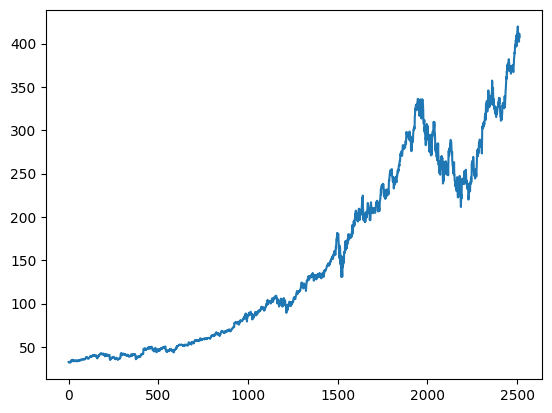

In [7]:
df.adjClose.plot()

In [8]:
# Calculate the differences for every column except for the RSI column
# df_diff = df.drop(columns=['RSI','MACD','MACD_signal','MACD_histogram']).diff().dropna()

# Calculate the RSI using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjOpen'], window=14)
df['RSI'] = rsi_indicator.rsi()

# Concatenate the differenced data with the RSI column
# diffs = pd.concat([df_diff, df[['RSI','MACD','MACD_signal','MACD_histogram']]], axis=1)


df_diff = df.drop(columns=['RSI']).diff().dropna()


diffs = pd.concat([df_diff, df[['RSI']]], axis=1)

# Display the resulting dataframe
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,RSI
1,"3 days, 0:00:00",-0.448848,-0.279472,-0.275237,-0.050813,NaN
2,"1 day, 0:00:00",0.533537,0.296409,0.486958,0.237127,NaN
3,"1 day, 0:00:00",-0.254065,-0.177930,-0.118564,0.042344,NaN
4,"1 day, 0:00:00",0.033875,-0.025322,-0.033875,-0.093157,NaN
5,"1 day, 0:00:00",-0.211721,0.101626,-0.169377,0.118564,NaN
...,...,...,...,...,...,...
2511,"1 day, 0:00:00",-0.610000,-2.200000,-0.790000,-3.070000,49.344387
2512,"1 day, 0:00:00",9.470000,10.540000,11.350000,10.020000,57.606315
2513,"1 day, 0:00:00",-1.310000,3.030000,0.400000,5.480000,61.321816
2514,"3 days, 0:00:00",-2.800000,-3.700000,-1.610000,-4.215000,57.171354


In [ ]:
# diffs= df.diff()

<AxesSubplot: >

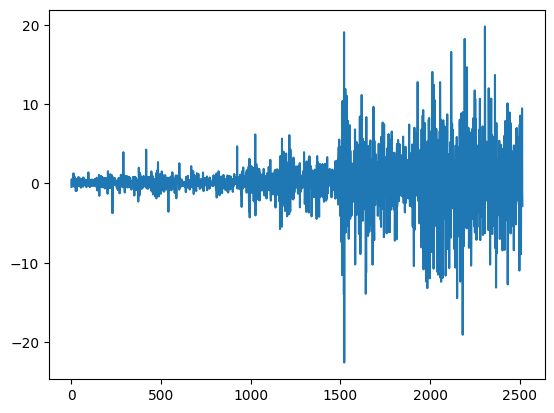

In [9]:
diffs.adjClose.plot()

In [10]:
diffs.corr()

,adjClose,adjHigh,adjLow,adjOpen,RSI
adjClose,1.000000,0.687632,0.695341,0.279269,0.063164
adjHigh,0.687632,1.000000,0.720607,0.694511,0.202437
adjLow,0.695341,0.720607,1.000000,0.707318,0.181443
adjOpen,0.279269,0.694511,0.707318,1.000000,0.278692
RSI,0.063164,0.202437,0.181443,0.278692,1.000000


In [11]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'adjCloseLag_{i}'] = diffs['adjClose'].shift(i)

for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'adjHighlag_{i}'] = diffs['adjHigh'].shift(i)

for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'adjLowlag_{i}'] = diffs['adjLow'].shift(i)

for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'adjOpenlag_{i}'] = diffs['adjOpen'].shift(i)



In [12]:
diffs.head(10)

,date,adjClose,adjHigh,adjLow,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,...,adjLowlag_1,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5
1,"3 days, 0:00:00",-0.448848,-0.279472,-0.275237,-0.050813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1 day, 0:00:00",0.533537,0.296409,0.486958,0.237127,NaN,-0.448848,NaN,NaN,NaN,...,-0.275237,NaN,NaN,NaN,NaN,-0.050813,NaN,NaN,NaN,NaN
3,"1 day, 0:00:00",-0.254065,-0.177930,-0.118564,0.042344,NaN,0.533537,-0.448848,NaN,NaN,...,0.486958,-0.275237,NaN,NaN,NaN,0.237127,-0.050813,NaN,NaN,NaN
4,"1 day, 0:00:00",0.033875,-0.025322,-0.033875,-0.093157,NaN,-0.254065,0.533537,-0.448848,NaN,...,-0.118564,0.486958,-0.275237,NaN,NaN,0.042344,0.237127,-0.050813,NaN,NaN
5,"1 day, 0:00:00",-0.211721,0.101626,-0.169377,0.118564,NaN,0.033875,-0.254065,0.533537,-0.448848,...,-0.033875,-0.118564,0.486958,-0.275237,NaN,-0.093157,0.042344,0.237127,-0.050813,NaN
6,"3 days, 0:00:00",-0.067751,-0.296409,0.025407,-0.245596,NaN,-0.211721,0.033875,-0.254065,0.533537,...,-0.169377,-0.033875,-0.118564,0.486958,-0.275237,0.118564,-0.093157,0.042344,0.237127,-0.050813
7,"1 day, 0:00:00",0.169377,0.186314,0.000000,-0.101626,NaN,-0.067751,-0.211721,0.033875,-0.254065,...,0.025407,-0.169377,-0.033875,-0.118564,0.486958,-0.245596,0.118564,-0.093157,0.042344,0.237127
8,"1 day, 0:00:00",0.211721,0.169377,0.059282,-0.059282,NaN,0.169377,-0.067751,-0.211721,0.033875,...,0.000000,0.025407,-0.169377,-0.033875,-0.118564,-0.101626,-0.245596,0.118564,-0.093157,0.042344
9,"1 day, 0:00:00",-0.321816,0.016938,-0.125847,0.525068,NaN,0.211721,0.169377,-0.067751,-0.211721,...,0.059282,0.000000,0.025407,-0.169377,-0.033875,-0.059282,-0.101626,-0.245596,0.118564,-0.093157
10,"1 day, 0:00:00",-0.160908,-0.266768,-0.114837,-0.651254,NaN,-0.321816,0.211721,0.169377,-0.067751,...,-0.125847,0.059282,0.000000,0.025407,-0.169377,0.525068,-0.059282,-0.101626,-0.245596,0.118564


In [13]:
diffs['date'] = df['date']
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,...,adjLowlag_1,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5
1,2014-03-03,-0.448848,-0.279472,-0.275237,-0.050813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-03-04,0.533537,0.296409,0.486958,0.237127,NaN,-0.448848,NaN,NaN,NaN,...,-0.275237,NaN,NaN,NaN,NaN,-0.050813,NaN,NaN,NaN,NaN
3,2014-03-05,-0.254065,-0.177930,-0.118564,0.042344,NaN,0.533537,-0.448848,NaN,NaN,...,0.486958,-0.275237,NaN,NaN,NaN,0.237127,-0.050813,NaN,NaN,NaN
4,2014-03-06,0.033875,-0.025322,-0.033875,-0.093157,NaN,-0.254065,0.533537,-0.448848,NaN,...,-0.118564,0.486958,-0.275237,NaN,NaN,0.042344,0.237127,-0.050813,NaN,NaN
5,2014-03-07,-0.211721,0.101626,-0.169377,0.118564,NaN,0.033875,-0.254065,0.533537,-0.448848,...,-0.033875,-0.118564,0.486958,-0.275237,NaN,-0.093157,0.042344,0.237127,-0.050813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,49.344387,-1.270000,-2.500000,-2.930000,3.912833,...,-5.430000,-0.850000,-0.280000,1.917477,-11.339232,-4.720000,-0.180000,0.070000,3.870311,-15.586453
2512,2024-02-22,9.470000,10.540000,11.350000,10.020000,57.606315,-0.610000,-1.270000,-2.500000,-2.930000,...,-0.790000,-5.430000,-0.850000,-0.280000,1.917477,-3.070000,-4.720000,-0.180000,0.070000,3.870311
2513,2024-02-23,-1.310000,3.030000,0.400000,5.480000,61.321816,9.470000,-0.610000,-1.270000,-2.500000,...,11.350000,-0.790000,-5.430000,-0.850000,-0.280000,10.020000,-3.070000,-4.720000,-0.180000,0.070000
2514,2024-02-26,-2.800000,-3.700000,-1.610000,-4.215000,57.171354,-1.310000,9.470000,-0.610000,-1.270000,...,0.400000,11.350000,-0.790000,-5.430000,-0.850000,5.480000,10.020000,-3.070000,-4.720000,-0.180000


In [14]:
diffs = diffs.drop(0)
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,...,adjLowlag_1,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5
1,2014-03-03,-0.448848,-0.279472,-0.275237,-0.050813,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-03-04,0.533537,0.296409,0.486958,0.237127,NaN,-0.448848,NaN,NaN,NaN,...,-0.275237,NaN,NaN,NaN,NaN,-0.050813,NaN,NaN,NaN,NaN
3,2014-03-05,-0.254065,-0.177930,-0.118564,0.042344,NaN,0.533537,-0.448848,NaN,NaN,...,0.486958,-0.275237,NaN,NaN,NaN,0.237127,-0.050813,NaN,NaN,NaN
4,2014-03-06,0.033875,-0.025322,-0.033875,-0.093157,NaN,-0.254065,0.533537,-0.448848,NaN,...,-0.118564,0.486958,-0.275237,NaN,NaN,0.042344,0.237127,-0.050813,NaN,NaN
5,2014-03-07,-0.211721,0.101626,-0.169377,0.118564,NaN,0.033875,-0.254065,0.533537,-0.448848,...,-0.033875,-0.118564,0.486958,-0.275237,NaN,-0.093157,0.042344,0.237127,-0.050813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,52.240910,-2.500000,-2.930000,3.912833,-8.923656,...,-0.850000,-0.280000,1.917477,-11.339232,-0.339378,-0.180000,0.070000,3.870311,-15.586453,5.295301
2511,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,49.344387,-1.270000,-2.500000,-2.930000,3.912833,...,-5.430000,-0.850000,-0.280000,1.917477,-11.339232,-4.720000,-0.180000,0.070000,3.870311,-15.586453
2512,2024-02-22,9.470000,10.540000,11.350000,10.020000,57.606315,-0.610000,-1.270000,-2.500000,-2.930000,...,-0.790000,-5.430000,-0.850000,-0.280000,1.917477,-3.070000,-4.720000,-0.180000,0.070000,3.870311
2513,2024-02-23,-1.310000,3.030000,0.400000,5.480000,61.321816,9.470000,-0.610000,-1.270000,-2.500000,...,11.350000,-0.790000,-5.430000,-0.850000,-0.280000,10.020000,-3.070000,-4.720000,-0.180000,0.070000


In [15]:
diffs.dropna()

,date,adjClose,adjHigh,adjLow,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,...,adjLowlag_1,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5
13,2014-03-19,-0.237127,-0.296409,0.584350,1.024729,71.082381,1.270326,0.296409,-0.160908,-0.321816,...,0.364160,0.240684,-0.114837,-0.125847,0.059282,0.304878,0.210874,-0.651254,0.525068,-0.059282
14,2014-03-20,0.897697,0.930725,0.279472,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,...,0.584350,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068
15,2014-03-21,-0.143970,0.246443,0.652101,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,...,0.279472,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254
16,2014-03-24,0.287940,-0.254065,-0.127033,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,...,0.652101,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874
17,2014-03-25,-0.135501,0.296409,0.084604,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,...,-0.127033,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,52.240910,-2.500000,-2.930000,3.912833,-8.923656,...,-0.850000,-0.280000,1.917477,-11.339232,-0.339378,-0.180000,0.070000,3.870311,-15.586453,5.295301
2511,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,49.344387,-1.270000,-2.500000,-2.930000,3.912833,...,-5.430000,-0.850000,-0.280000,1.917477,-11.339232,-4.720000,-0.180000,0.070000,3.870311,-15.586453
2512,2024-02-22,9.470000,10.540000,11.350000,10.020000,57.606315,-0.610000,-1.270000,-2.500000,-2.930000,...,-0.790000,-5.430000,-0.850000,-0.280000,1.917477,-3.070000,-4.720000,-0.180000,0.070000,3.870311
2513,2024-02-23,-1.310000,3.030000,0.400000,5.480000,61.321816,9.470000,-0.610000,-1.270000,-2.500000,...,11.350000,-0.790000,-5.430000,-0.850000,-0.280000,10.020000,-3.070000,-4.720000,-0.180000,0.070000


In [16]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()
diffs.dropna(inplace=True)

In [17]:
diffs['target']=diffs['target'].shift(1)
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,...,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5,target
13,2014-03-19,-0.237127,-0.296409,0.584350,1.024729,71.082381,1.270326,0.296409,-0.160908,-0.321816,...,0.240684,-0.114837,-0.125847,0.059282,0.304878,0.210874,-0.651254,0.525068,-0.059282,NaN
14,2014-03-20,0.897697,0.930725,0.279472,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,...,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068,0.0
15,2014-03-21,-0.143970,0.246443,0.652101,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,...,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254,1.0
16,2014-03-24,0.287940,-0.254065,-0.127033,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,...,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874,0.0
17,2014-03-25,-0.135501,0.296409,0.084604,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,...,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,52.240910,-2.500000,-2.930000,3.912833,-8.923656,...,-0.280000,1.917477,-11.339232,-0.339378,-0.180000,0.070000,3.870311,-15.586453,5.295301,0.0
2511,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,49.344387,-1.270000,-2.500000,-2.930000,3.912833,...,-0.850000,-0.280000,1.917477,-11.339232,-4.720000,-0.180000,0.070000,3.870311,-15.586453,0.0
2512,2024-02-22,9.470000,10.540000,11.350000,10.020000,57.606315,-0.610000,-1.270000,-2.500000,-2.930000,...,-5.430000,-0.850000,-0.280000,1.917477,-3.070000,-4.720000,-0.180000,0.070000,3.870311,0.0
2513,2024-02-23,-1.310000,3.030000,0.400000,5.480000,61.321816,9.470000,-0.610000,-1.270000,-2.500000,...,-0.790000,-5.430000,-0.850000,-0.280000,10.020000,-3.070000,-4.720000,-0.180000,0.070000,1.0


In [18]:
diffs.columns

Index(['date', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'RSI',
       'adjCloseLag_1', 'adjCloseLag_2', 'adjCloseLag_3', 'adjCloseLag_4',
       'adjCloseLag_5', 'adjHighlag_1', 'adjHighlag_2', 'adjHighlag_3',
       'adjHighlag_4', 'adjHighlag_5', 'adjLowlag_1', 'adjLowlag_2',
       'adjLowlag_3', 'adjLowlag_4', 'adjLowlag_5', 'adjOpenlag_1',
       'adjOpenlag_2', 'adjOpenlag_3', 'adjOpenlag_4', 'adjOpenlag_5',
       'target'],
      dtype='object')

In [19]:
adjClose_df = diffs[['adjClose', 'date', 'RSI']]

In [20]:
diffs.drop(['date','adjClose', 'adjHigh', 'adjLow'],axis=1,inplace=True)
diffs.head()


,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,adjCloseLag_5,adjHighlag_1,adjHighlag_2,adjHighlag_3,...,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5,target
13,1.024729,71.082381,1.270326,0.296409,-0.160908,-0.321816,0.211721,1.261857,0.232893,-0.266768,...,0.240684,-0.114837,-0.125847,0.059282,0.304878,0.210874,-0.651254,0.525068,-0.059282,NaN
14,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,-0.321816,-0.296409,1.261857,0.232893,...,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068,0.0
15,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,-0.160908,0.930725,-0.296409,1.261857,...,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254,1.0
16,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,0.296409,0.246443,0.930725,-0.296409,...,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874,0.0
17,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,1.270326,-0.254065,0.246443,0.930725,...,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878,1.0


In [21]:
diffs.dropna(inplace=True)

In [22]:
diffs.head()

,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,adjCloseLag_5,adjHighlag_1,adjHighlag_2,adjHighlag_3,...,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5,target
14,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,-0.321816,-0.296409,1.261857,0.232893,...,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068,0.0
15,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,-0.160908,0.930725,-0.296409,1.261857,...,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254,1.0
16,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,0.296409,0.246443,0.930725,-0.296409,...,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874,0.0
17,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,1.270326,-0.254065,0.246443,0.930725,...,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878,1.0
18,-0.152439,69.957616,-0.135501,0.287940,-0.143970,0.897697,-0.237127,0.296409,-0.254065,0.246443,...,-0.127033,0.652101,0.279472,0.584350,0.271003,-0.321816,1.244919,-0.186314,1.024729,0.0


In [23]:
# # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
df_predict = diffs.tail(506)
# See results
df_predict



,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,adjCloseLag_5,adjHighlag_1,adjHighlag_2,adjHighlag_3,...,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5,target
2009,-3.250842,40.315057,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,-3.997259,0.679048,3.959599,...,-2.677677,5.557160,-2.812883,-6.351040,-1.969166,-1.004944,6.113856,-9.232530,-0.833084,0.0
2010,-7.906127,35.634433,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,-2.887455,-3.997259,0.679048,...,-3.614230,-2.677677,5.557160,-2.812883,-3.250842,-1.969166,-1.004944,6.113856,-9.232530,0.0
2011,5.087421,40.427371,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,-2.278536,-2.887455,-3.997259,...,-3.628962,-3.614230,-2.677677,5.557160,-7.906127,-3.250842,-1.969166,-1.004944,6.113856,0.0
2012,-17.354195,31.743796,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,0.157140,-2.278536,-2.887455,...,-1.772740,-3.628962,-3.614230,-2.677677,5.087421,-7.906127,-3.250842,-1.969166,-1.004944,0.0
2013,22.225548,47.343260,14.064068,-7.316851,-0.206247,-2.749957,-8.613259,3.398162,0.157140,-2.278536,...,-4.321362,-1.772740,-3.628962,-3.614230,-17.354195,5.087421,-7.906127,-3.250842,-1.969166,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-4.720000,52.240910,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,-0.840000,-0.710000,0.518691,...,-0.280000,1.917477,-11.339232,-0.339378,-0.180000,0.070000,3.870311,-15.586453,5.295301,0.0
2511,-3.070000,49.344387,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,-3.800000,-0.840000,-0.710000,...,-0.850000,-0.280000,1.917477,-11.339232,-4.720000,-0.180000,0.070000,3.870311,-15.586453,0.0
2512,10.020000,57.606315,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,-2.200000,-3.800000,-0.840000,...,-5.430000,-0.850000,-0.280000,1.917477,-3.070000,-4.720000,-0.180000,0.070000,3.870311,0.0
2513,5.480000,61.321816,9.470000,-0.610000,-1.270000,-2.500000,-2.930000,10.540000,-2.200000,-3.800000,...,-0.790000,-5.430000,-0.850000,-0.280000,10.020000,-3.070000,-4.720000,-0.180000,0.070000,1.0


In [24]:
# # Removing last 2 years from the original dataframe
diffs.drop(df_predict.index,inplace = True)
# See results
diffs

,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,adjCloseLag_5,adjHighlag_1,adjHighlag_2,adjHighlag_3,...,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5,target
14,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,-0.321816,-0.296409,1.261857,0.232893,...,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068,0.0
15,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,-0.160908,0.930725,-0.296409,1.261857,...,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254,1.0
16,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,0.296409,0.246443,0.930725,-0.296409,...,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874,0.0
17,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,1.270326,-0.254065,0.246443,0.930725,...,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878,1.0
18,-0.152439,69.957616,-0.135501,0.287940,-0.143970,0.897697,-0.237127,0.296409,-0.254065,0.246443,...,-0.127033,0.652101,0.279472,0.584350,0.271003,-0.321816,1.244919,-0.186314,1.024729,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,-0.833084,45.075027,-8.654272,6.517656,3.538156,-4.890693,4.596663,-2.754077,6.242249,-2.233645,...,7.291934,0.049005,-0.068607,0.009801,-5.709075,8.443550,-4.822086,5.841388,-9.095316,0.0
2005,-9.232530,39.343292,-7.193925,-8.654272,6.517656,3.538156,-4.890693,-4.733877,-2.754077,6.242249,...,-6.556860,7.291934,0.049005,-0.068607,-0.833084,-5.709075,8.443550,-4.822086,5.841388,0.0
2006,6.113856,44.386527,-0.039204,-7.193925,-8.654272,6.517656,3.538156,-7.380143,-4.733877,-2.754077,...,-6.351040,-6.556860,7.291934,0.049005,-9.232530,-0.833084,-5.709075,8.443550,-4.822086,0.0
2007,-1.004944,43.742732,5.361140,-0.039204,-7.193925,-8.654272,6.517656,3.959599,-7.380143,-4.733877,...,-2.812883,-6.351040,-6.556860,7.291934,6.113856,-9.232530,-0.833084,-5.709075,8.443550,1.0


In [25]:
diffs.iloc[:,:-1]

,adjOpen,RSI,adjCloseLag_1,adjCloseLag_2,adjCloseLag_3,adjCloseLag_4,adjCloseLag_5,adjHighlag_1,adjHighlag_2,adjHighlag_3,...,adjLowlag_1,adjLowlag_2,adjLowlag_3,adjLowlag_4,adjLowlag_5,adjOpenlag_1,adjOpenlag_2,adjOpenlag_3,adjOpenlag_4,adjOpenlag_5
14,-0.186314,66.501878,-0.237127,1.270326,0.296409,-0.160908,-0.321816,-0.296409,1.261857,0.232893,...,0.584350,0.364160,0.240684,-0.114837,-0.125847,1.024729,0.304878,0.210874,-0.651254,0.525068
15,1.244919,77.113970,0.897697,-0.237127,1.270326,0.296409,-0.160908,0.930725,-0.296409,1.261857,...,0.279472,0.584350,0.364160,0.240684,-0.114837,-0.186314,1.024729,0.304878,0.210874,-0.651254
16,-0.321816,70.864275,-0.143970,0.897697,-0.237127,1.270326,0.296409,0.246443,0.930725,-0.296409,...,0.652101,0.279472,0.584350,0.364160,0.240684,1.244919,-0.186314,1.024729,0.304878,0.210874
17,0.271003,72.859084,0.287940,-0.143970,0.897697,-0.237127,1.270326,-0.254065,0.246443,0.930725,...,-0.127033,0.652101,0.279472,0.584350,0.364160,-0.321816,1.244919,-0.186314,1.024729,0.304878
18,-0.152439,69.957616,-0.135501,0.287940,-0.143970,0.897697,-0.237127,0.296409,-0.254065,0.246443,...,0.084604,-0.127033,0.652101,0.279472,0.584350,0.271003,-0.321816,1.244919,-0.186314,1.024729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,-0.833084,45.075027,-8.654272,6.517656,3.538156,-4.890693,4.596663,-2.754077,6.242249,-2.233645,...,-6.556860,7.291934,0.049005,-0.068607,0.009801,-5.709075,8.443550,-4.822086,5.841388,-9.095316
2005,-9.232530,39.343292,-7.193925,-8.654272,6.517656,3.538156,-4.890693,-4.733877,-2.754077,6.242249,...,-6.351040,-6.556860,7.291934,0.049005,-0.068607,-0.833084,-5.709075,8.443550,-4.822086,5.841388
2006,6.113856,44.386527,-0.039204,-7.193925,-8.654272,6.517656,3.538156,-7.380143,-4.733877,-2.754077,...,-2.812883,-6.351040,-6.556860,7.291934,0.049005,-9.232530,-0.833084,-5.709075,8.443550,-4.822086
2007,-1.004944,43.742732,5.361140,-0.039204,-7.193925,-8.654272,6.517656,3.959599,-7.380143,-4.733877,...,5.557160,-2.812883,-6.351040,-6.556860,7.291934,6.113856,-9.232530,-0.833084,-5.709075,8.443550


In [26]:
from pycaret.classification import *
s = setup(diffs, target='target', fold_strategy='timeseries', session_id=123)



c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\utils\validation\series.py:21: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\forecasting\base\_fh.py:18: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\forecasting\base\_fh.py:19: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\

,Description,Value
0,Session id,123
1,Target,target
2,Target type,classification
3,Data shape,"(1995, 23)"
4,Train data shape,"(1396, 23)"
5,Test data shape,"(599, 23)"
6,Numeric features,22
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [27]:
#  Obtaining top 3 best models
top5 = compare_models(n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0840
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0630
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0310
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4040
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9650
lr,Logistic Regression,0.9524,0.9894,0.9800,0.9407,0.9589,0.9015,0.9052,0.8010
et,Extra Trees Classifier,0.9190,0.9828,0.9594,0.9013,0.9286,0.8338,0.8382,0.0690
svm,SVM - Linear Kernel,0.8683,0.0000,0.8889,0.8978,0.8803,0.7359,0.7604,0.0130


In [ ]:
# lightgbm = create_model('lightgbm')
lr = create_model('lr')
# lda = create_model('lda')


In [ ]:
# tuned_light = tune_model(lightgbm,optimize='AUC')
tuned_lr = tune_model(lr,optimize='AUC')
# tuned_lda = tune_model(lda, optimize='AUC')

In [ ]:
# interpret_model(tuned_light)
# interpret_model(lda)
evaluate_model(tuned_lr)
# interpret_model(lda)

In [ ]:
# catboost= create_model('catboost')

In [ ]:
# lr = create_model('lr')

In [ ]:
# tune_lr = tune_model(lr, n_iter=2000)
tune_catboost = tune_model(catboost, n_iter = 50)


In [ ]:

evaluate_model(tune_catboost)

In [ ]:
# final_lr_model = finalize_model(tune_lr)
final_catboost_model = finalize_model(tune_catboost)


In [ ]:
df_predict

In [ ]:
predictions = predict_model(final_catboost_model,
                          data =df_predict)
predictions.head(50)

In [ ]:
adjClose_df.dropna(inplace=True)

In [ ]:
merged_df = predictions.merge(adjClose_df, on='RSI', how='inner')
merged_df

In [ ]:
# Create a new column 'Profit_Loss' and calculate cumulative total
merged_df['Profit_Loss'] = 0  # Initialize the column with zeros
cumulative_total = 0  # Initialize cumulative total

# Apply the logic to calculate profits and losses and update cumulative total
for index, row in merged_df.iterrows():
    if row['Score'] > 0.7:
        merged_df.at[index, 'Profit_Loss'] = row['adjClose']
        cumulative_total += row['adjClose']
    else:
        merged_df.at[index, 'Profit_Loss'] = -row['adjClose']
        cumulative_total -= row['adjClose']
    merged_df.at[index, 'Cumulative_Total'] = cumulative_total

# Display the updated DataFrame
merged_df

In [ ]:


merged_df['Cumulative_Total'] = merged_df['Profit_Loss'].cumsum()
merged_df.tail(6)

In [ ]:
# fig = px.line(predictions, x=df_predict.index, y=["adjOpen","Label"], template='plotly_dark')
# # Add a vertical rectangle for test-set separation
# # fig.add_vrect(x0="2023-01-01", x1="2024-31-01", fillcolor="grey", opacity=0.25, line_width=0)
# # Show the plot
# fig.show()